# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.

## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)

* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

### 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_2021053

* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [20]:
# 주피터 노트북 저장 경로 확인하기
%pwd

'C:\\Users\\최여사\\devssom\\data_analysis\\public_data'

In [21]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7850-43A2

 C:\Users\최여사\devssom\data_analysis\public_data\data 디렉터리

2021-07-19  오후 07:37    <DIR>          .
2021-07-19  오후 07:37    <DIR>          ..
2021-07-19  오후 05:50             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2021-07-19  오후 04:24           220,777 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv
               2개 파일             222,940 바이트
               2개 디렉터리  421,289,795,584 바이트 남음


In [22]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리 불러오기
import pandas as pd
import numpy as np

## 데이터 로드

### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러오기. 이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않음. 보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있음. df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드하기.

In [23]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담기
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보기
df_last = pd.read_csv("data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv", encoding="cp949", engine="python")

# 데이터 개수가 몇개인지 봐보면 (행, 렬)
df_last.shape

(5780, 5)

In [24]:
# head 로 데이터 파일 미리보기 (디폴트 : 5개만 보임)
# df_last.head(10) 이렇게 10을 넣으면, 데이터 10개가 보임

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [25]:
# tail 로도 미리보기 할 수 있음. 대신 얘는 뒤에서부터 5개

df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
5775,제주,모든면적,2021,5,7510
5776,제주,전용면적 60㎡이하,2021,5,NaN
5777,제주,전용면적 60㎡초과 85㎡이하,2021,5,7497
5778,제주,전용면적 85㎡초과 102㎡이하,2021,5,NaN
5779,제주,전용면적 102㎡초과,2021,5,7727


### 2013년부터 2015년 8월까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일 불러오기. df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력

In [26]:
%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7850-43A2

 C:\Users\최여사\devssom\data_analysis\public_data\data 디렉터리

2021-07-19  오후 07:37    <DIR>          .
2021-07-19  오후 07:37    <DIR>          ..
2021-07-19  오후 05:50             2,163 전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
2021-07-19  오후 04:24           220,777 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv
               2개 파일             222,940 바이트
               2개 디렉터리  421,289,795,584 바이트 남음


In [27]:
# df_first 변수 생성해서 데이터 담기

df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949", engine="python")

# df_first 데이터 갯수 보기
df_first.shape

(17, 22)

In [28]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [29]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기

df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


최근 데이터와 2013 - 2015년 데이터는 너무 달라. 그래서 전혀 다른 두 개의 데이터셋을 불러온다면, 서로 일치 시켜줘야됨

### 데이터 요약하기

In [30]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5780 non-null   object
 1   규모구분     5780 non-null   object
 2   연도       5780 non-null   int64 
 3   월        5780 non-null   int64 
 4   분양가격(㎡)  5331 non-null   object
dtypes: int64(2), object(3)
memory usage: 225.9+ KB


* RangeIndex는 5780개인데, 분양가격의 데이터는 5331개. 차이나는 만큼 결측치가 있을거라는 걸 생각하면 됨
* 분양가격이 수치형 데이터가 아니라 object 타입으로 되어 있는 걸 확인
(-> 나중에 수치형으로 바꿔줘야겠다고 생각하면 됨)

### 결측치 보기
isnull 혹은 isna를 통해 데이터가 비어있는지를 확인할 수 있음. 결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됨.

In [31]:
True == 1

True

In [32]:
False == 0

True

In [33]:
True + True + False

2

In [34]:
df_last.isnull()

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
5775,False,False,False,False,False
5776,False,False,False,False,True
5777,False,False,False,False,False
5778,False,False,False,False,True


In [35]:
# isnull 을 통해 결측치를 구하기

df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

In [36]:
# isna 을 통해 결측치를 구하기

df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어있었어. 그런데, 문자열 타입은 계산할 수 없기 때문에 수치 테이터로 변경을 해줘야함. 결측치가 섞여 있을 때는 변환이 제대로 되지 않음. 그래서 pd.to_numeric을 통해서 데이터의 타입을 변경해주기

In [37]:
# 이렇게만 하면, "  " 공백이 있는 문자 때문에 에러가 발생함

pd.to_numeric(df_last["분양가격(㎡)"])

ValueError: Unable to parse string "  " at position 28

In [38]:
# "  " 공백이 있는 문자 때문에, errors='coerce' 옵션값을 사용해서 강제로 변환시켜

pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
5775    7510.0
5776       NaN
5777    7497.0
5778       NaN
5779    7727.0
Name: 분양가격(㎡), Length: 5780, dtype: float64

데이터 타입이 float로 나오는 이유? NaN 때문에

In [39]:
type(np.nan)

float

In [40]:
# 새로운 컬럼인 분양가격에 flaot값들로 변환한 데이터를 넣어줘

df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")
df_last["분양가격"].head(1)

0    5841.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와있는 2013년부터의 데이터는 평당분양가격 기준으로 되어있음. 2013년부터의 데이터의 기준에 맞춰주기 위해, 분양가격을 평당가격기준으로 바꿔주기로 함. 그래서 분양가격에 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가하기

In [41]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3


### 분양가격 요약하기

In [42]:
# info를 통해 분양가격 보기

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5331 non-null   object 
 5   분양가격     5239 non-null   float64
 6   평당분양가격   5239 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 316.2+ KB


In [43]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약

df_last["분양가격(㎡)"].describe()

count     5331
unique    2175
top       3395
freq        18
Name: 분양가격(㎡), dtype: object

In [44]:
# 수치데이터로 변경된 분양가격 컬럼을 요약

df_last["분양가격"].describe()

count     5239.000000
mean      3423.688490
std       1394.479806
min       1868.000000
25%       2548.000000
50%       3046.000000
75%       3881.000000
max      13835.000000
Name: 분양가격, dtype: float64

오브젝트 타입과 수치데이터 타입은 다르게 요약됨을 알 수 있음.

* 두 개의 count 값이 달라지는 이유는, object에 공백으로 결측치가 있었기 때문에 숫자로 바꾸면서 데이터 개수가 달라짐. 
* ubnique : 중복되지 않은 값이 얼마나 있는지. 보통 카데고리 형태의 데이터나 스트링 데이터를 요약할 때 나오는 값
* top : 가장 빈번하게 등장하는 값이 뭐냐 (3395)
* freq : 가장 빈번하게 등장하는 값이 몇 번 등장하는지 (3395가 18번 등장)

* mean : 평균값
* std : 표준편차
* min : 최소값
* 25% : 1사분위 수. 전체 데이터를 1열로 쭉 세웠을 때, 25%에 해당하는 값
* 50% : 중앙값. medium 값
* 75% : 3사분위 수. 전체 데이터를 1열로 쭉 세웠을 때, 75%에 해당하는 값
* max : 최대값

주의해서 봐야할 점은, 평균값과 중앙값이 얼만큼 차이가 나는지. 중앙값(3046)보다 평균값(3423)이 높잖아. 그럼 max값이 13835로 높기 때문에 중앙값과 평균값의 차이가 많이 벌어지는 것임을 알 수 있음

### 규보구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있음. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들기(메모리를 좀 더 효율적으로 쓸 수 있게)

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경함

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [45]:
df_last["규모구분"].unique

<bound method Series.unique of 0                    모든면적
1              전용면적 60㎡이하
2        전용면적 60㎡초과 85㎡이하
3       전용면적 85㎡초과 102㎡이하
4             전용면적 102㎡초과
              ...        
5775                 모든면적
5776           전용면적 60㎡이하
5777     전용면적 60㎡초과 85㎡이하
5778    전용면적 85㎡초과 102㎡이하
5779          전용면적 102㎡초과
Name: 규모구분, Length: 5780, dtype: object>

In [46]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
# 글자 사이, 앞뒤의 공백도 제거해줘
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"]

0           모든면적
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
5775        모든면적
5776         60㎡
5777     60㎡~85㎡
5778    85㎡~102㎡
5779       102㎡~
Name: 전용면적, Length: 5780, dtype: object

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거하기. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미함. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인.

In [47]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,모든면적,2015,10,5841,5841.0,19275.3,모든면적


In [48]:
# 제거 하기전에 메모리 용량 확인
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5331 non-null   object 
 5   분양가격     5239 non-null   float64
 6   평당분양가격   5239 non-null   float64
 7   전용면적     5780 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 361.4+ KB


In [49]:
# drop 사용시 axis에 유의하기
# axis 0: 행, 1: 열
df_last.drop?

In [52]:
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

KeyError: "['규모구분' '분양가격(㎡)'] not found in axis"

In [51]:
# 제거하고나서 메모리사용량을 봐보면 줄어든 걸 알 수 있어
df_last.info

<bound method DataFrame.info of      지역명    연도   월    분양가격   평당분양가격      전용면적
0     서울  2015  10  5841.0  19275.3      모든면적
1     서울  2015  10  5652.0  18651.6       60㎡
2     서울  2015  10  5882.0  19410.6   60㎡~85㎡
3     서울  2015  10  5721.0  18879.3  85㎡~102㎡
4     서울  2015  10  5879.0  19400.7     102㎡~
...   ..   ...  ..     ...      ...       ...
5775  제주  2021   5  7510.0  24783.0      모든면적
5776  제주  2021   5     NaN      NaN       60㎡
5777  제주  2021   5  7497.0  24740.1   60㎡~85㎡
5778  제주  2021   5     NaN      NaN  85㎡~102㎡
5779  제주  2021   5  7727.0  25499.1     102㎡~

[5780 rows x 6 columns]>

In [53]:
# 제거가 잘됐는지도 확인
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적


## groupby로 데이터 집계하기
groupby를 통해 지역별 분양가격의 평균값을 구하고 그래프로 그려보기. pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있음. seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은, 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠름.

In [54]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화하기
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()

df_last.groupby(["지역명"])["평당분양가격"].mean()

지역명
강원     8513.887616
경기    13770.545373
경남     9697.110736
경북     8845.387261
광주    10961.214235
대구    12870.898165
대전    10460.474104
부산    12436.025373
서울    25097.504776
세종    10155.856071
울산    11007.227103
인천    12788.048338
전남     8078.028875
전북     7931.842342
제주    12242.880000
충남     8484.695584
충북     7848.807207
Name: 평당분양가격, dtype: float64

In [55]:
# describe를 써서 요약된 값들을 볼 수도 있어
df_last.groupby(["지역명"])["평당분양가격"].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,323.0,8513.887616,1657.991272,6639.6,7329.30,7926.60,9339.000,14100.9
경기,335.0,13770.545373,1956.684223,10160.7,11980.65,13955.70,14835.150,18958.5
경남,326.0,9697.110736,1769.545217,7260.0,8769.75,9477.60,10142.550,16566.0
경북,314.0,8845.387261,1339.710777,6949.8,7887.00,8634.45,9461.100,13450.8
광주,281.0,10961.214235,2150.394613,7428.3,9167.40,10583.10,12672.000,16107.3
대구,327.0,12870.898165,2328.983265,8259.9,10612.80,13091.10,15024.900,17021.4
대전,251.0,10460.474104,2079.948273,8002.5,8758.20,10101.30,11484.000,16094.1
부산,335.0,12436.025373,1424.131201,9669.0,11399.85,12691.80,13381.500,15255.9
서울,335.0,25097.504776,4788.719912,16701.3,21651.30,23991.00,27160.650,45655.5


In [56]:
# 전용면적으로 분양가격의 평균을 구하기

df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       12158.183186
60㎡         10928.500000
60㎡~85㎡     10853.938448
85㎡~102㎡    11844.695066
모든면적        10869.903470
Name: 평당분양가격, dtype: float64

In [57]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구하기 (2개 그룹바이)

df_last.groupby(["지역명", "전용면적"])["평당분양가격"].mean()

지역명  전용면적    
강원   102㎡~       9572.561194
     60㎡         8209.217910
     60㎡~85㎡     7957.285075
     85㎡~102㎡    8914.980000
     모든면적        7987.231343
                    ...     
충북   102㎡~       8430.022388
     60㎡         7370.180597
     60㎡~85㎡     7501.491045
     85㎡~102㎡    8508.415385
     모든면적        7453.616418
Name: 평당분양가격, Length: 85, dtype: float64

In [58]:
# unstack을 쓰면, 가장 뒤에다 쓴 컬럼(지역명)으로 컬럼을 따로 빼서 만들 수도 있어
# round를 쓰면, 소수점 제거 가능

df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,9573.0,15142.0,10347.0,9555.0,12220.0,13893.0,14875.0,13278.0,25146.0,10417.0,11588.0,14984.0,8992.0,8339.0,11448.0,8886.0,8430.0
60㎡,8209.0,13505.0,8942.0,8474.0,10270.0,12728.0,9657.0,11866.0,24422.0,9801.0,10634.0,12106.0,7575.0,7820.0,14133.0,8058.0,7370.0
60㎡~85㎡,7957.0,12982.0,9009.0,8478.0,10604.0,12656.0,10087.0,12295.0,23740.0,10117.0,11244.0,12279.0,7710.0,7561.0,12126.0,8124.0,7501.0
85㎡~102㎡,8915.0,14205.0,11190.0,9406.0,11587.0,12367.0,9037.0,12395.0,28375.0,10150.0,9226.0,12513.0,8402.0,8367.0,10709.0,9446.0,8508.0
모든면적,7987.0,13019.0,9044.0,8496.0,10654.0,12649.0,10141.0,12346.0,23805.0,10181.0,11156.0,12189.0,7715.0,7585.0,12244.0,8101.0,7454.0


In [59]:
# 연도, 지역명으로 평당분양가격의 평균 구하기
# g라는 변수에 담아 놓으면, 나중에 시각화하기 편해짐
# g에도 마찬가지로 메소드들을 이어붙일 수 있음
# transpose 를 쓰면, 행과 열을 바꿔줄 수 있어 

g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
g.unstack().transpose()

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000,10302.423214,10539.540000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000,15106.080000,14701.764000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789,10919.272222,11289.168000
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000,9997.693750,11152.680000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000,13406.485714,13711.637500
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000,15314.200000,15622.200000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000,11238.844737,11222.860000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000,13353.010000,13724.304000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000,29781.015000,28832.364000


## pivot table 로 데이터 집계하기
groupby로 했던 작업을 pivot_table로 똑같이 해보기

* 기본적인 연산, 평균, 분산, 표준편차, 최댓값, 최솟값, 중앙값 등의 값을 연산하기 위한 목적으로 사용할거라면 사실 groupby를 쓰든 pivot_table을 쓰든 큰 상관이 없음

groupby vs pivot_table의 차이점?
* pivot_table의 반환값은 항상 잘 정리된 데이터프레임으로 나옴
* groupby는 컬럼이 series 형태라면 series 로 반환됨. 그래서 속도가 더 빠른 편
* groupby는 좀 더 다양한 연산(aggregation), 변형(transform) 등을 할 수 있고, 인덱스 레벨에 따라 다른 연산을 할 수 있음. 특히 시계열 데이터로 증권 데이터의 시세나 이동평균, 누적 값 등을 구한다면 groupby를 사용하는게 좋음

In [ ]:
pd.pivot_table?

In [60]:
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"], aggfunc="mean")

,평당분양가격
지역명,
강원,8513.887616
경기,13770.545373
경남,9697.110736
경북,8845.387261
광주,10961.214235
대구,12870.898165
대전,10460.474104
부산,12436.025373
서울,25097.504776


In [61]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()
# groupby는 시리즈 형태로 가져옴

전용면적
102㎡~       12158.183186
60㎡         10928.500000
60㎡~85㎡     10853.938448
85㎡~102㎡    11844.695066
모든면적        10869.903470
Name: 평당분양가격, dtype: float64

In [62]:
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

# pivot_table은 데이터프레임으로 가져옴

,평당분양가격
전용면적,
102㎡~,12158.183186
60㎡,10928.500000
60㎡~85㎡,10853.938448
85㎡~102㎡,11844.695066
모든면적,10869.903470


pivot과 pivot_table의 차이? 연산을 할 수 있느냐(pivot_table), 없느냐(pivot)

In [63]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구하기
# df_last.groupby(["지역명", "전용면적"])["평당분양가격"].mean()

df_last.pivot_table(index=["전용면적", "지역명"], values="평당분양가격")

평당분양가격
전용면적  지역명              
102㎡~ 강원    9572.561194
      경기   15142.370149
      경남   10347.040000
      경북    9554.995312
      광주   12220.266667
...                 ...
모든면적  전남    7715.449254
      전북    7585.025373
      제주   12244.034328
      충남    8100.958209
      충북    7453.616418

[85 rows x 1 columns]

In [64]:
# 그런데, 위에 groupby에서 unstack으로 지역명을 컬럼으로 뺀 것 처럼 하려면
# pivot_table에서는 columns로 지정해주면됨. 그럼 똑같이 나옴.

df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격")

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,9572.561194,15142.370149,10347.040000,9554.995312,12220.266667,13893.394030,14875.080000,13278.017910,25146.049254,10417.234426,11587.816216,14983.938095,8992.105970,8339.247761,11447.513208,8886.340678,8430.022388
60㎡,8209.217910,13505.126866,8941.527692,8474.202985,10269.759677,12728.198507,9656.990164,11866.405970,24421.822388,9801.471429,10634.178261,12106.320896,7575.023077,7819.768657,14133.288889,8057.614925,7370.180597
60㎡~85㎡,7957.285075,12981.855224,9008.556716,8478.291045,10604.328358,12656.386567,10087.361194,12294.667164,23739.510448,10116.946552,11244.124138,12279.152239,7709.588060,7561.334328,12125.628358,8123.861194,7501.491045
85㎡~102㎡,8914.980000,14204.825373,11190.053731,9406.279592,11586.512903,12366.833898,9037.430769,12395.489552,28375.468657,10149.548276,9226.140000,12513.107463,8402.323810,8366.820000,10709.082353,9446.163158,8508.415385
모든면적,7987.231343,13018.549254,9043.723881,8495.628358,10653.877612,12649.491045,10140.653731,12345.546269,23804.673134,10181.473770,11156.446552,12188.820896,7715.449254,7585.025373,12244.034328,8100.958209,7453.616418


In [65]:
# 연도, 지역명으로 평당분양가격의 평균 구하기
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()

p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
p.loc[2018]  # 2018년 데이터만 가지고 오기

,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러오기

In [66]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic")

### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용해서 다양한 그래프를 그릴 수 있음. seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠름

<AxesSubplot:xlabel='지역명'>

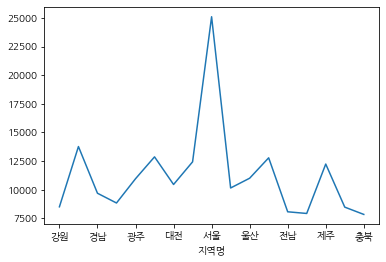

In [67]:
# 지역명으로 분양가격의 평균을 구하고, 선그래프로 시각화하기

df_last.groupby(["지역명"])["평당분양가격"].mean().plot()

<AxesSubplot:xlabel='지역명'>

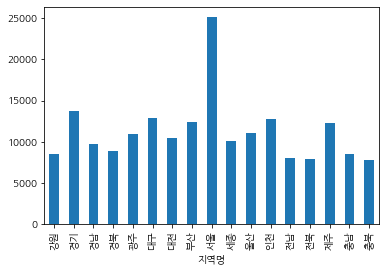

In [68]:
# 지역명으로 분양가격의 평균을 구하고, 막대그래프(bar)로 시각화하기

g = df_last.groupby(["지역명"])["평당분양가격"].mean()
g.plot.bar()

<AxesSubplot:xlabel='지역명'>

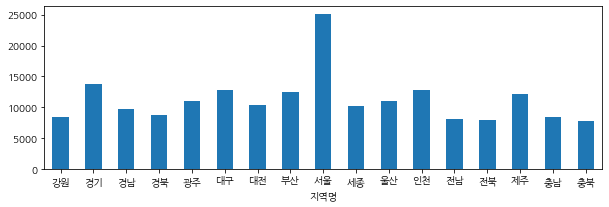

In [69]:
# 글씨를 똑바로 보고 싶다하면 rot=0, 그래프가 너무 좁아서 조정하려면 figsize=(10,3) 

g = df_last.groupby(["지역명"])["평당분양가격"].mean()
g.plot.bar(rot=0, figsize=(10, 3))

<AxesSubplot:xlabel='지역명'>

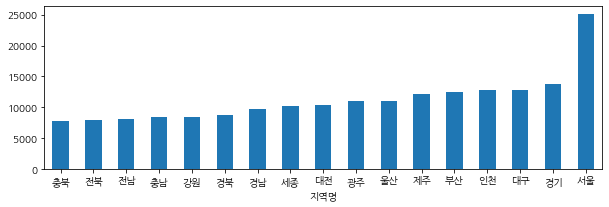

In [70]:
# 그래프를 값 순서대로 정렬해서 보고싶다하면 sort_vlaues() 

g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values()
g.plot.bar(rot=0, figsize=(10, 3))

<AxesSubplot:xlabel='지역명'>

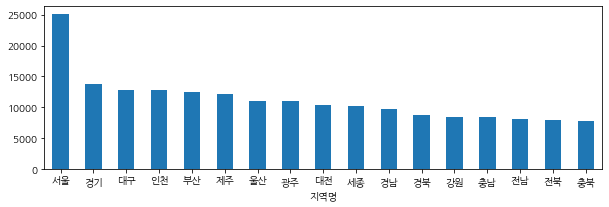

In [71]:
# 내림차순으로 보고싶다하면 sort_vlaues() 에서 ascending=false

g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot.bar(rot=0, figsize=(10, 3))

전용면적별 분양가격의 평균값을 구하고 그래프로 그려보기

<AxesSubplot:xlabel='전용면적'>

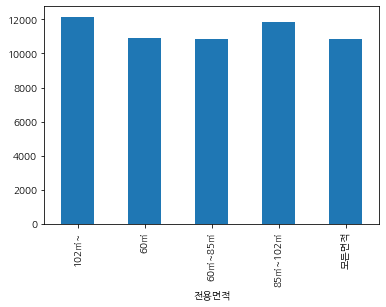

In [72]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화하기

df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

<AxesSubplot:xlabel='연도'>

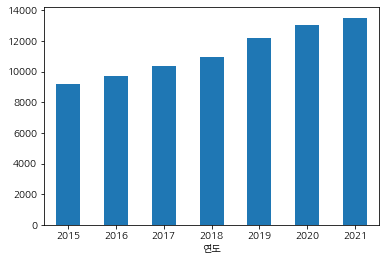

In [73]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화하기

df_last.groupby(["연도"])["평당분양가격"].mean().plot.bar(rot=0)

### box-and-whisker plot | diagram
* bar 그래프보다 좀 더 자세하게 표현할 수 있음
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그림
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯가지 수칙을 의미

1. 최소값
2. 제 1사분위수 : 25%
3. 제 2사분위수() : 중앙값 50%
4. 제 3사분위수() : 75%
5. 최대값

https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

<AxesSubplot:>

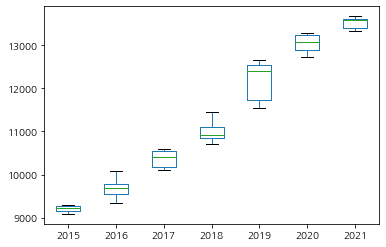

In [74]:
# 연도별 분양가격의 평균을 구하고 box그래프로 시각화하기

df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

각 연도별로 최소값과 최대값이 어느정도인지 확인할 수 있으니까 변동폭을 보기 쉬움

<AxesSubplot:>

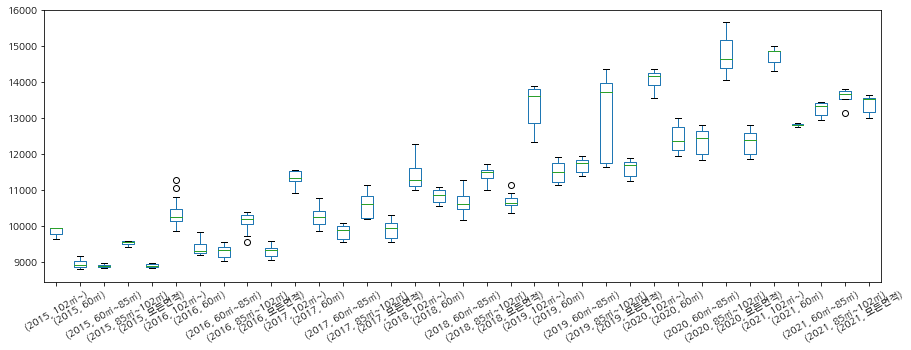

In [75]:
# 연도별, 전용면적별 분양가격의 평균을 구하고 box그래프로 시각화하기

p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15, 5), rot=30)

<AxesSubplot:xlabel='연도'>

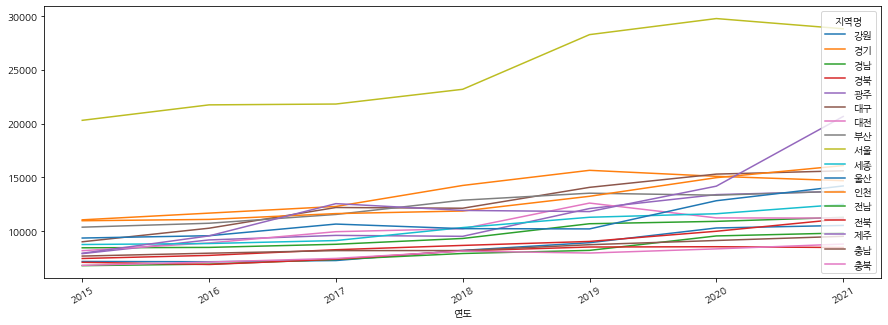

In [76]:
# 연도별 분양가격의 평균을 구하고 라인그래프로 시각화하기

p = df_last.pivot_table(index="연도", columns="지역명", values="평당분양가격")
p.plot(figsize=(15, 5), rot=30)

### Seaborn으로 시각화 하기

* pandas처럼 따로 연산(ex.mean)을 하지 않아도, 그래프를 그리면 알아서 연산이 됨
* subplot 그리기가 쉬움

In [77]:
import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

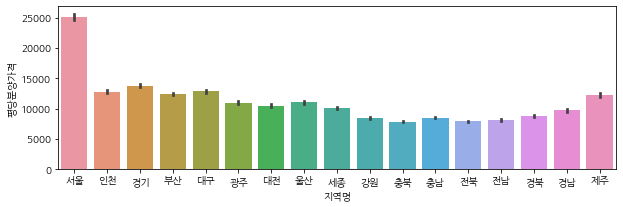

In [78]:
# barplot으로 지역별 평당분양가격을 시각화하기

plt.figure(figsize=(10, 3)) # 그래프 사이즈
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=95)

# 막대 위의 검은색 점들은, ci(confidence interval) = 95가 기본값.
# 신뢰구간 95%의 비율로 추정해서 샘플림 했을 때의 값
# 나머지 5%의 값은 이상치라고 볼 수 있음.
# 이상치 값을 제거한 95%를 샘플링 했을 때 이 범위에 포함된다


<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

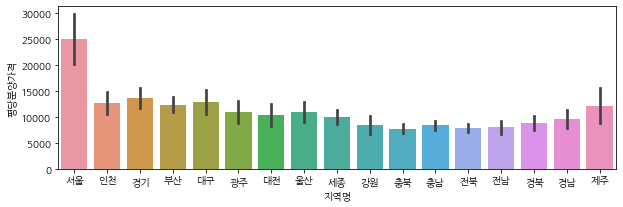

In [79]:
# ci="sd" 일 때에는, 실제 관측한 값의 표준편차를 그려주게 됨

plt.figure(figsize=(10, 3)) # 그래프 사이즈
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci="sd")

서울, 경기, 제주 등 분양가가 상승한 지역들이 표준편차가 크다는 걸 확인할 수 있음

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

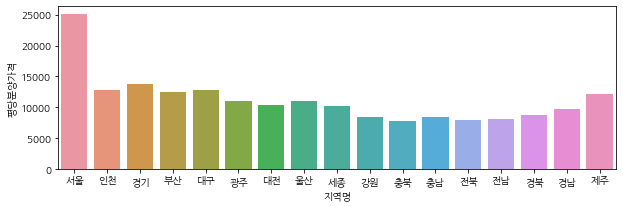

In [80]:
# ci를 그리고 싶지 않을 때에는 ci=None. ci 그리면서 속도가 느려지니까.

plt.figure(figsize=(10, 3)) # 그래프 사이즈
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

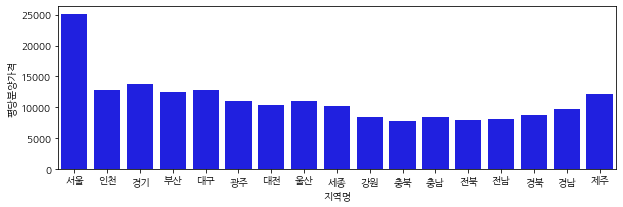

In [81]:
# pandas로 그렸을 때랑 똑같이 그려보기 위해서 설정을 바꿔줄거야
# color값을 blue로 변경

plt.figure(figsize=(10, 3)) # 그래프 사이즈
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None, color="b")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

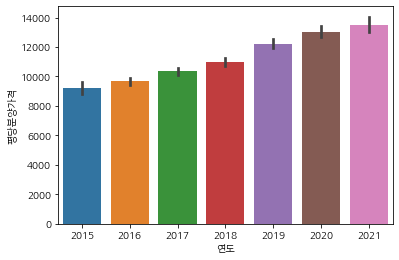

In [82]:
# barplot으로 연도별 평당분양가격을 시각화하기

sns.barplot(data=df_last, x="연도", y="평당분양가격")

연도별로 평균분양가격이 꾸준이 상승하고 있다는걸 확인할 수 있음

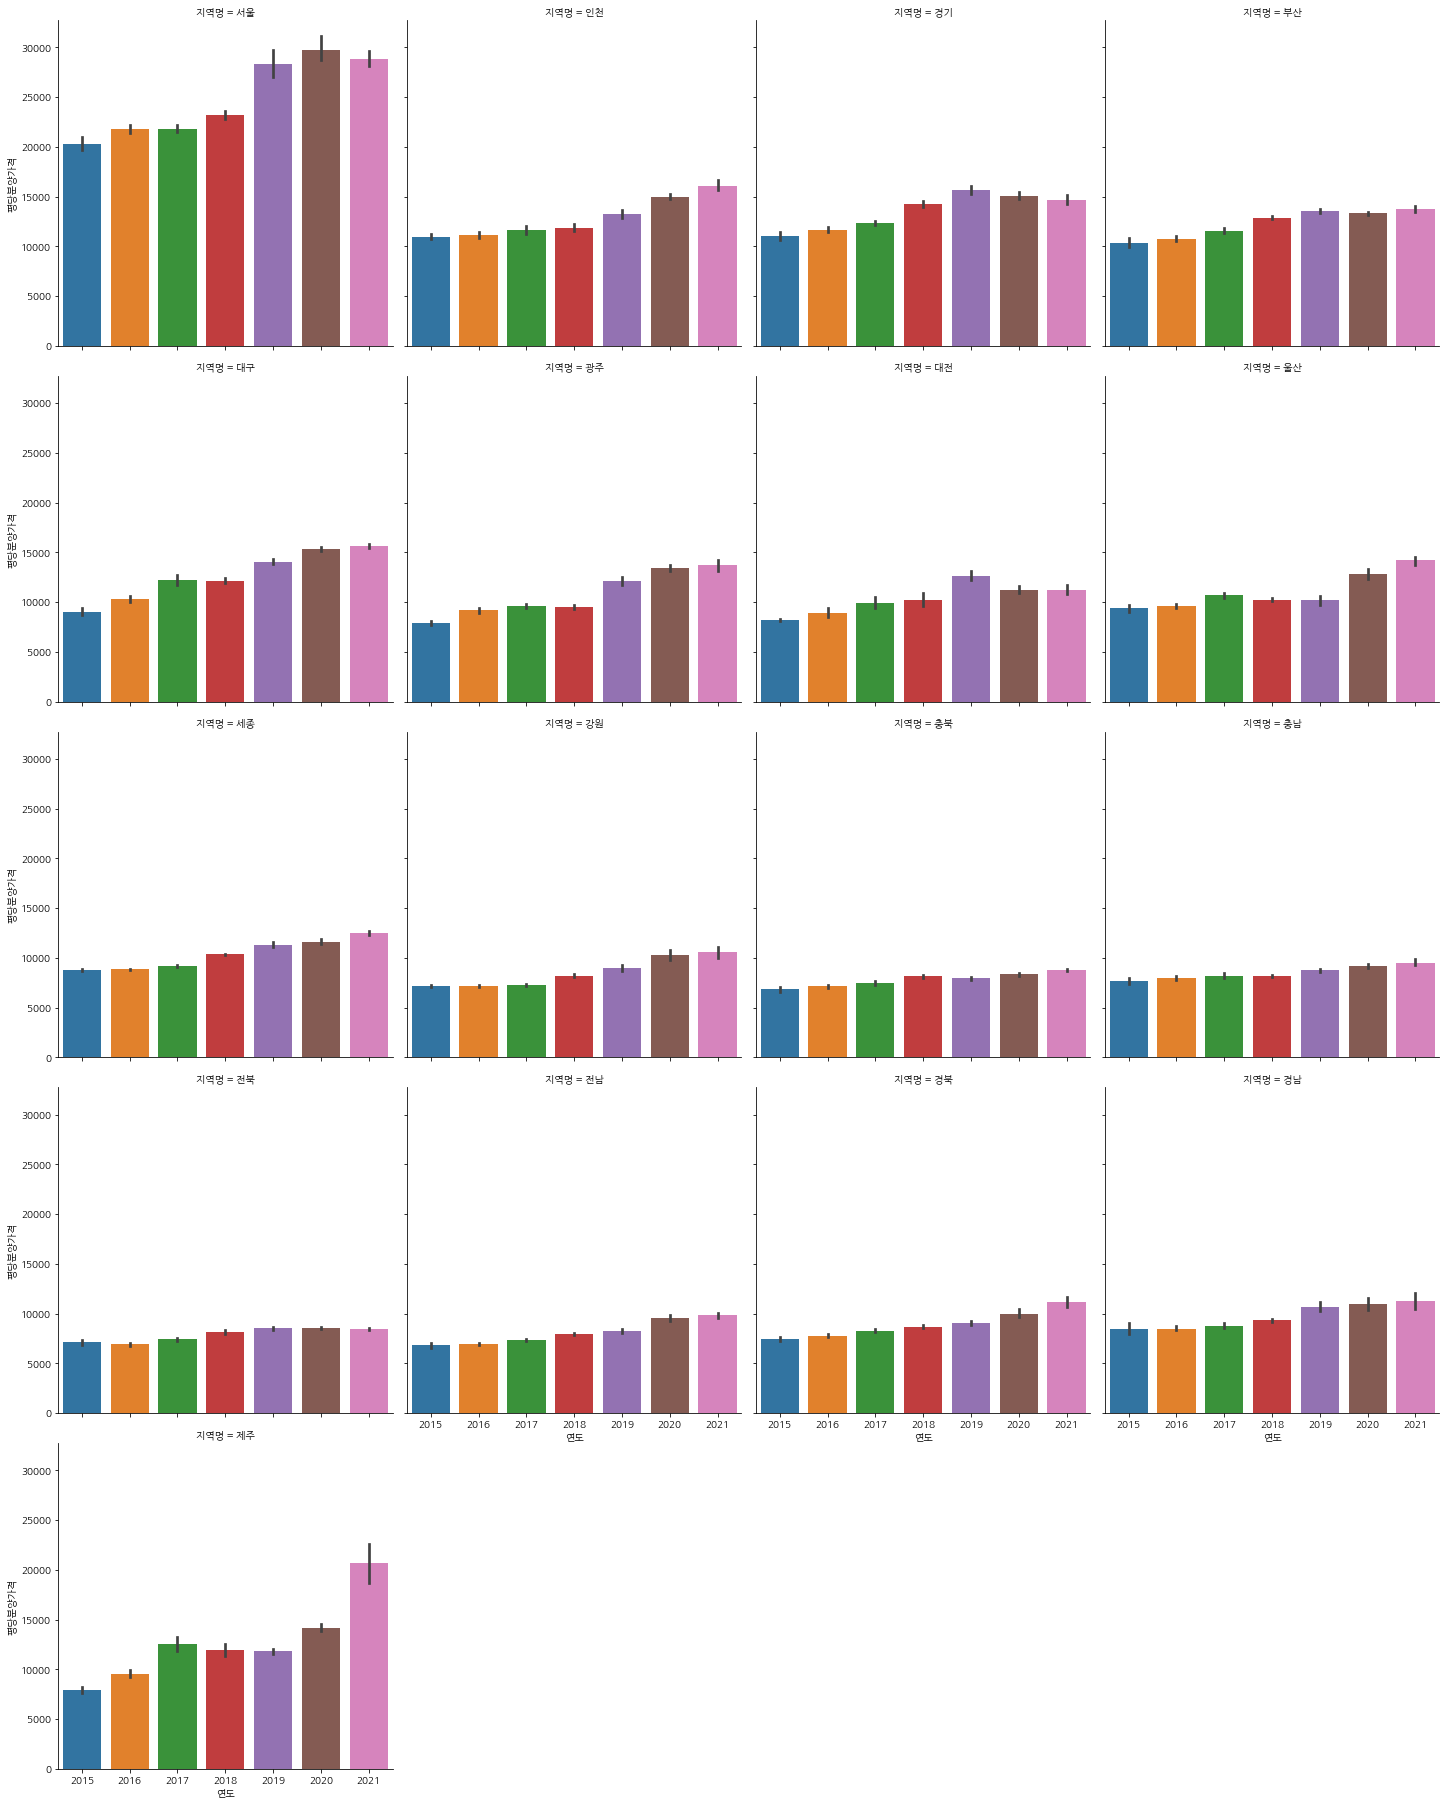

In [83]:
# barplot의 subplot인 catplot으로 지역별로 그래프를 따로따로 그릴 수 있어
# 지역별로 연도별 평당분양가격을 보여주는 것

sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

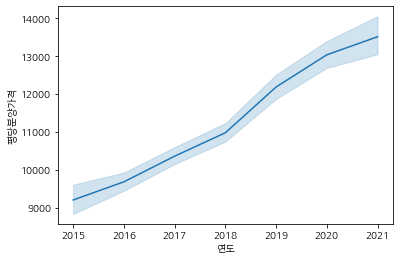

In [84]:
# lineplot으로 연도별 평당분양가격을 시각화하기

sns.lineplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

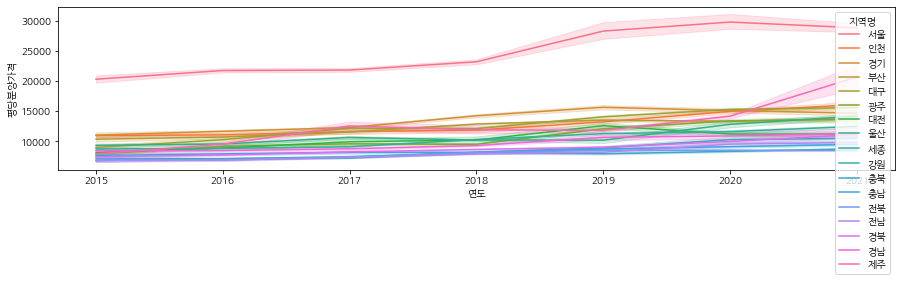

In [85]:
# hue 옵션을 통해 지역별로 다르게 표시해 보기
# hue="카테고리형식의 값" 에 따라서 다른 색상으로 표시해줌

plt.figure(figsize=(15, 3))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")

위 그래프에선 범례가 그래프를 다 가려서 안보이잖아. 걔를 밖으로 빼는 걸 하려면
https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot 참고해서 plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
소스코드를 가져옴

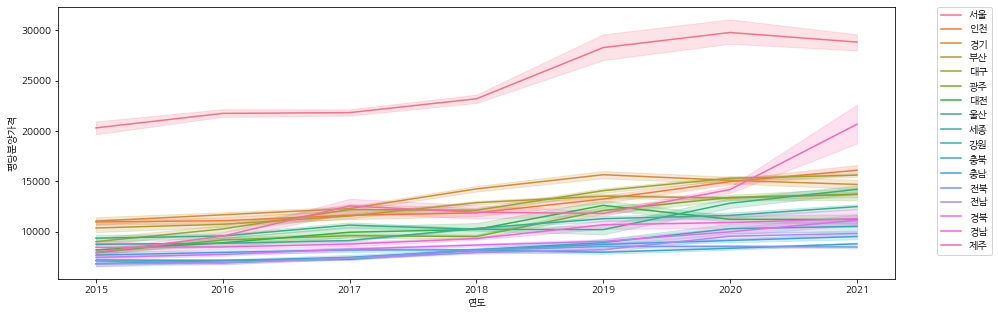

In [86]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

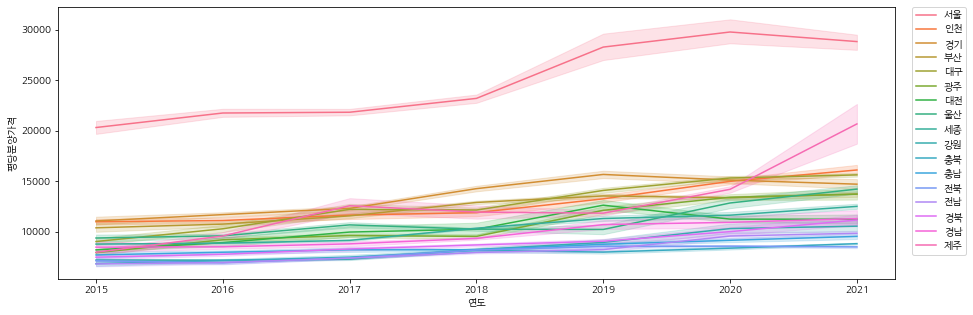

In [87]:
# bbox_to anchor값으로 범례랑 그래프 사이의 간격을 조절할 수 있음

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)  

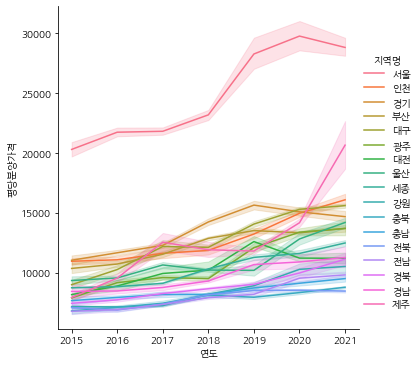

In [88]:
# 위의 그래프가 너무 몰려있어서 값들이 제대로 안보이니까
# subplot인 relplot으로 다시 그려줄거야

sns.relplot(data=df_last, x="연도", y="평당분양가격", hue="지역명", kind="line")

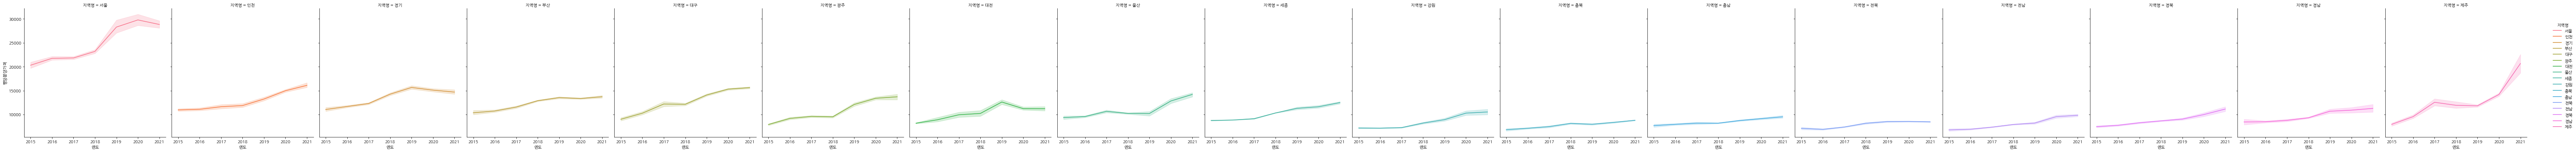

In [89]:
# col값을 줘서 지역별로 다 따로 그리면

sns.relplot(data=df_last, x="연도", y="평당분양가격", hue="지역명", kind="line", col="지역명")

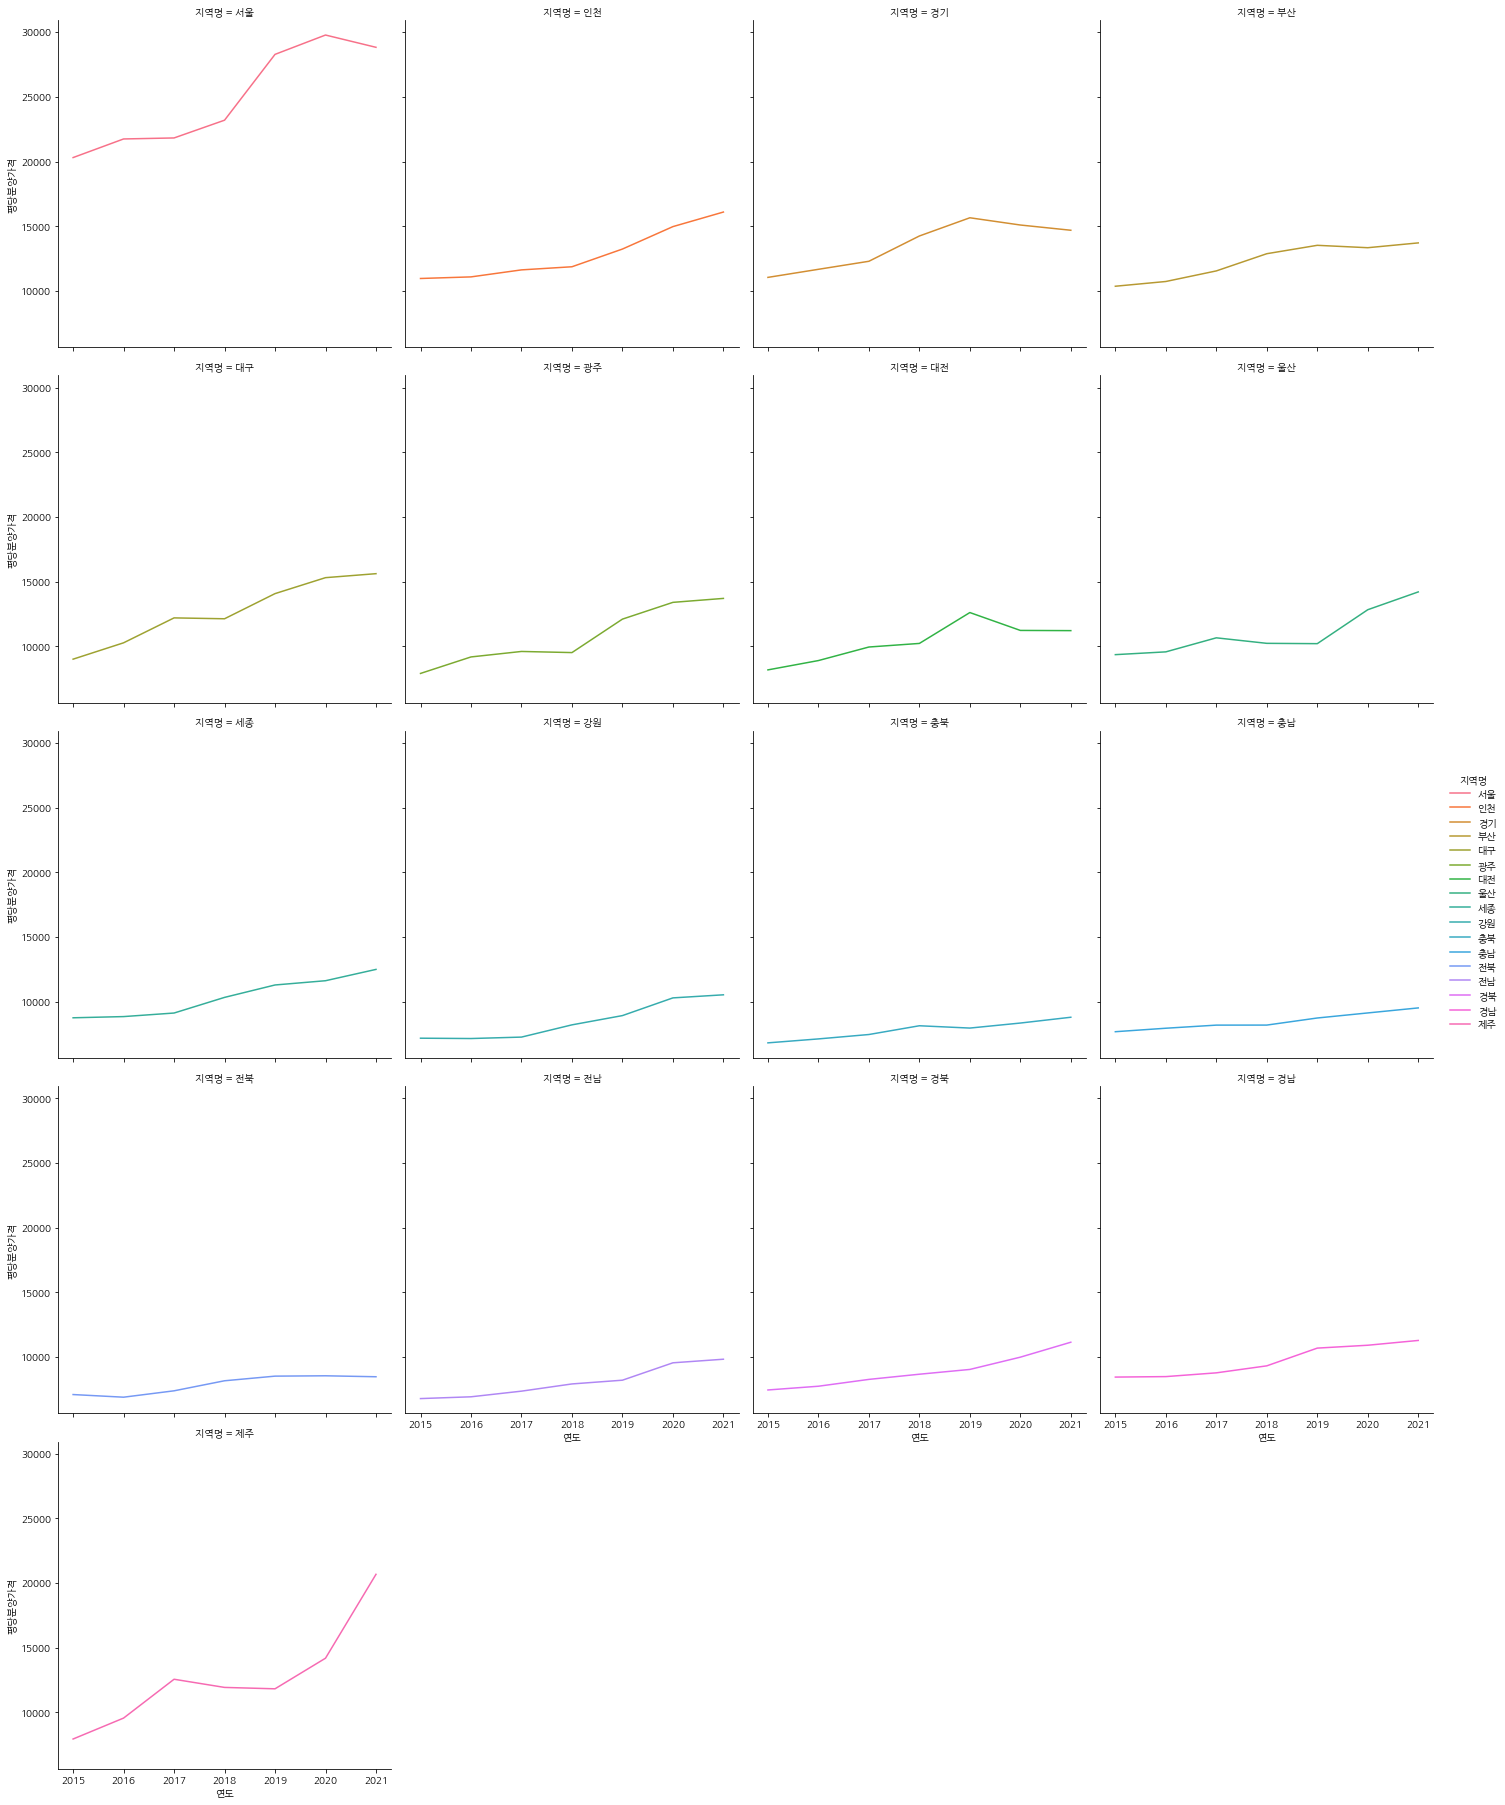

In [90]:
# 너무 작고 한줄에 다닥다닥 들어있어서 안보이니까 col_wrap으로 한 줄에 몇 개 넣을지 정해줘
# ci=None 해주면 연산을 덜하기 때문에 약간 빨라져

sns.relplot(data=df_last, x="연도", y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

### boxflot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

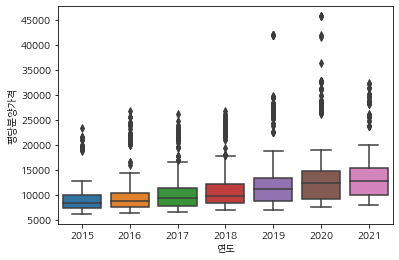

In [91]:
# 연도별 평당분양가격을 boxplot으로 그리기

# 최소값
# 제 1사분위수 : 25%
# 제 2사분위수() : 중앙값 50%
# 제 3사분위수() : 75%
# 최대값

# 위에 떠 있는 점들은 이상치를 뜻함

sns.boxplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

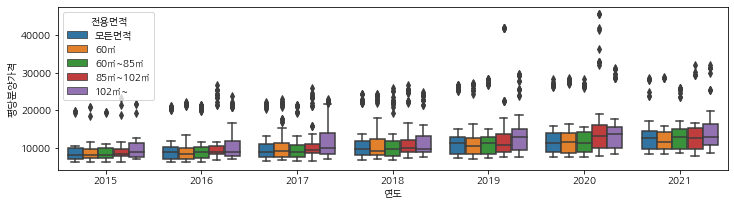

In [92]:
# hue 옵션을 줘서 전용면적별로 다르게 표시해보기

plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

대체적으로 상승하고 있고, 전용면적별로 얼마나 차이가 있는지를 보면,
면적이 커질수록 편차가 더 커진다는 걸 알 수 있음

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

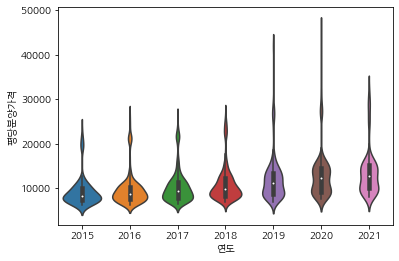

In [93]:
# 연도별 평당분양가격을 violinplot으로 그리기

# violinplot은 boxplot의 단점을 보완해줌
# boxplot은 박스 안의 값이 어떤식으로 분포되어있는지 알기 어려운데
# violinplot은 밀도를 추정한 값을 그려주게 돼. 

sns.violinplot(data=df_last, x="연도", y="평당분양가격")

### lmplot과 swarmplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

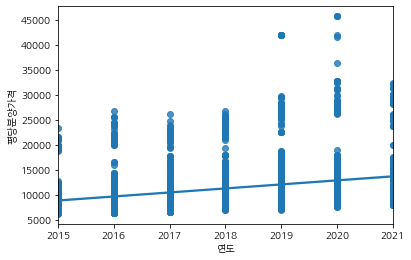

In [94]:
#regplot 먼저 그려보기
# scatterplot에 회귀선을 그어주는 그래프가 regplot

sns.regplot(data=df_last, x="연도", y="평당분양가격") 
# 약간 우상향하니까 양의 상관관계가 있다
# regplot은 hue값을 설정할 수 없어. 쓰면 오류가 나. 그래서 그럴 땐 lmplot을 씀 

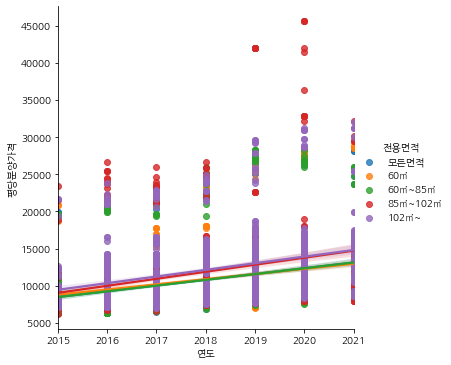

In [95]:
# 연도별 평당분양가격을 lmplot으로 그리기
# hue 옵션으로 전용면적을 표현하기

sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

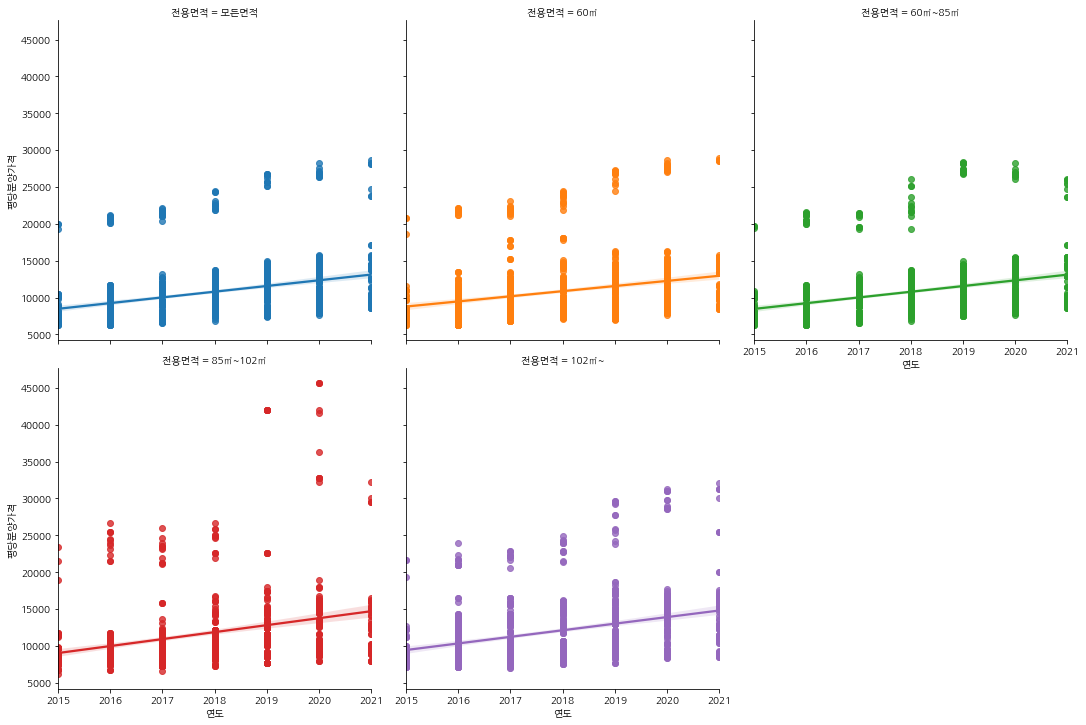

In [96]:
# 그런데, 위에선 색이 너무 겹쳐보여셔, 어느게 어떤건지 구분이 잘 안돼
# 그래서 이 그래프를 나눠서 보고 싶어 -> subplot을 그려볼거야

sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적", col="전용면적", col_wrap=3)

위에 처럼 lmplot을 그리게 되면, 데이터가 많이 겹쳐있을 땐, 분포를 알기가 어려워. 그래서 lmplot의 단점을 보완해야할 필요가 있음.

lmplot은 x, y값이 둘 다 수치데이터일 때 그리는게 적합함. 근데, 지금 x값인 "연도"는 수치데이터라기보다 카데고리 형태에 가까워. 그래서 이럴 땐, swarmplot으로 그리게됨.

C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

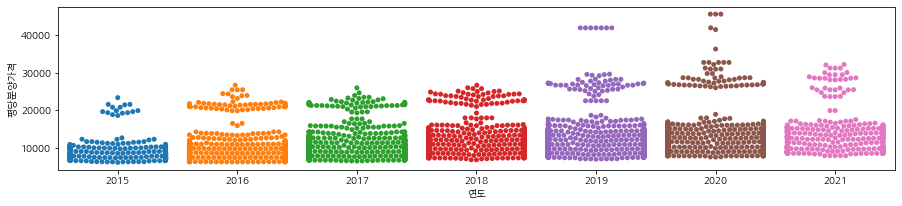

In [97]:
# 연도별 평당분양가격을 swarmplot으로 그리기
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합함
# lmplot의 단점을 보완해서, 점들을 하나하나씩 다 찍어주는데, 옆으로 번지게 찍어줌
# 어디에 데이터가 얼마나 분포가 되어있는지 확인할 수 있음
# 하나하나 점을 다 찍기 때문에, 너무 많은 데이터를 swarmplot으로 나타내기엔 어려움

plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격")

C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

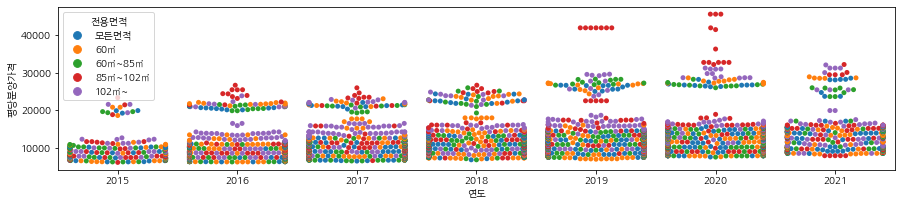

In [98]:
# hue값을 넣어서 구분할 수도 있음

plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

### 이상치 보기

In [99]:
df_last["평당분양가격"].describe()

count     5239.000000
mean     11298.172018
std       4601.783358
min       6164.400000
25%       8408.400000
50%      10051.800000
75%      12807.300000
max      45655.500000
Name: 평당분양가격, dtype: float64

요약된 걸 보면, 평균값과 최대값의 차이가 많이 나고, 75%가 3사분위 값인데, 이것과 최대값의 차이도 많이 나고, 평균값과 중앙값을 봐도 평균값이 중앙값보다 더 높은 걸 알 수 있음. 그래서, 이상치에 평균값이 영향을 많이 받았겠다는 생각이 들게됨.

In [100]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담기

max_price = df_last["평당분양가격"].max()
max_price

45655.5

In [101]:
# 서울의 평당분양가격이 특히 높은 데이터가 있음. 해당 데이터를 가져오기

df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
4423,서울,2020,2,13835.0,45655.5,85㎡~102㎡
4508,서울,2020,3,13835.0,45655.5,85㎡~102㎡
4593,서울,2020,4,13835.0,45655.5,85㎡~102㎡


### 수치데이터 히스토그램 그리기
지금까지 해봤던 시각화들은 x, y 두 개의 축이 들어간 시각화를 해봤는데,
이번에는 수치데이터만 가지고 시각화를 해볼거임

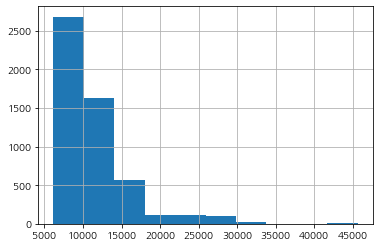

In [102]:
# pandas에서 hist를 해주면, 히스토그램을 그리게됨
# 출력될 때 그래프 위에 문구가 등장하는 게 싫다 하면 변수에 넣으면 됨

h = df_last["평당분양가격"].hist()

히스토그램은 막대를 통해서 빈도수를 표현하기 때문에,
위 그래프에서는 평당분양가격이 어느정도 가격대에 분포하는지 알 수 있음.

500-1000만원이 제일 많고(천원 단위)
4000만원 이상인 것은 적다

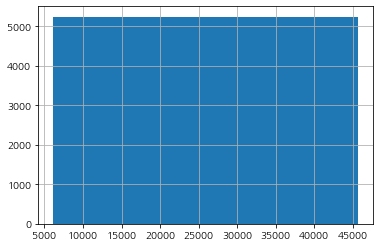

In [103]:
# hist의 옵션에 bins라는 게 있는데, 이건 막대의 개수를 설정함
# 몇 개의 통을 만들어서 데이터를 담아줄 것인지

h = df_last["평당분양가격"].hist(bins=1)

이렇게 수치데이터를 카테고리 형태로 바꾸는 작업을 binning 이나 bucketing이라고 함.

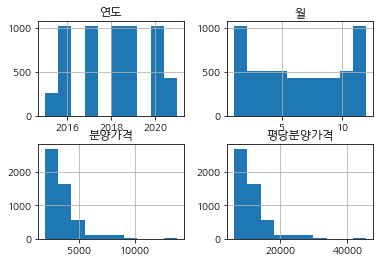

In [104]:
# hisplot은 전체 데이터에 대해서도 그려볼 수 있음

h = df_last.hist(bins=10)

연도, 월 등 수치형태로 되어있는 데이터는 히스토그램으로 그려볼 수 있음

월로 그려봤을 때, 어떤 달들은 데이터가 적게 있다.
연도로 봤을 때, 2015년과 2021년에는 전체 데이터가 있는게 아니라 일부만 있다 라는 걸 확인할 수 있음

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 남. 따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만들기. 데이터프레임의 .loc를 활용해서 결측치가 없는 데이터에서 평당분양가격만 가져와야됨

In [105]:
# 결측치가 없는 데이터에서 평당분양가격만 가져오기. 그리고 price라는 변수에 담기.
# 1) 결측치 없는 데이터 만들기

df_last[df_last["평당분양가격"].notnull()]

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
5773,경남,2021,5,4091.0,13500.3,85㎡~102㎡
5774,경남,2021,5,3223.0,10635.9,102㎡~
5775,제주,2021,5,7510.0,24783.0,모든면적
5777,제주,2021,5,7497.0,24740.1,60㎡~85㎡


In [106]:
# 2) 결측치 없는 데이터에서 평당분양가격만 가져오기, price라는 변수에 담기
# .loc[행]
# .loc[행, 열]

price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]
price

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
5773    13500.3
5774    10635.9
5775    24783.0
5777    24740.1
5779    25499.1
Name: 평당분양가격, Length: 5239, dtype: float64

C:\devssom\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

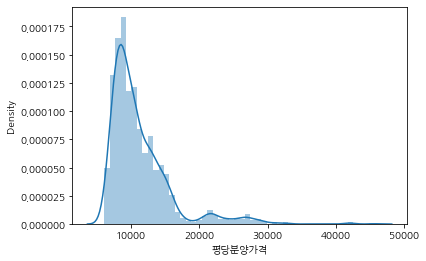

In [107]:
# distplot으로 평당분양가격을 그리기
# 얘는 지금까지와 다르게 x, y의 값이 없음. 시리즈 데이터를 그대로 넣어줌

sns.distplot(price)

그래프 왼쪽에 표시된 값들은, 부드러운 곡선을 같이 그리는데,
이 부드러운 곡선을 그린 값에 대해서 밀도를 추정했을 때 1이 되는 값임.
kda : 가우시안 분포를 추정해서 그리게 됨

C:\devssom\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\devssom\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

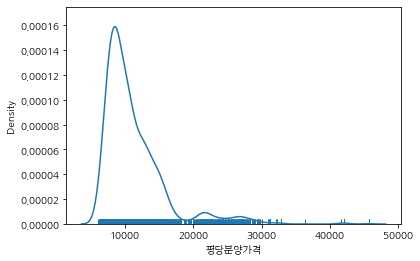

In [108]:
# distplot에서 히스토그램은 빼고 추정곡선만 그리고 싶다면

# 1) 첫 번째 방법 - distplot에서 hist=False로 그리기

sns.distplot(price, hist=False, rug=True)  # rug는 밑에 카펫처럼 깔리는 애들

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

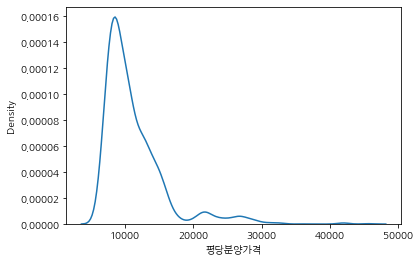

In [109]:
# distplot에서 히스토그램은 빼고 추정곡선만 그리고 싶다면

# 2) 두 번째 방법 - kdeplot으로 그리기

sns.kdeplot(price)  # kdeplot은 rug옵션은 없음

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

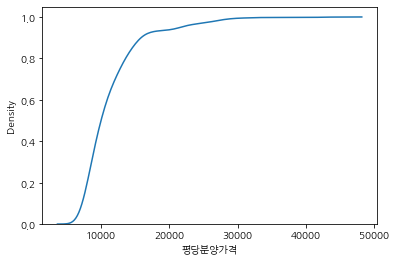

In [110]:
# kdeplot으로 그릴 때는, 이런 누적그래프도 그려볼 수 있음
# 지금 데이터로는 별로 의미없지만, 나중에 누적판매액이나 누적거래양 이런거 구할 땐 유용함

sns.kdeplot(price, cumulative=True)

* distplot을 산마루 형태의 ridge plot으로 그리기 (subplot)
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
https://seaborn.pydata.org/examples/kde_ridgeplot.html

C:\devssom\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\devssom\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\devssom\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\devssom\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `

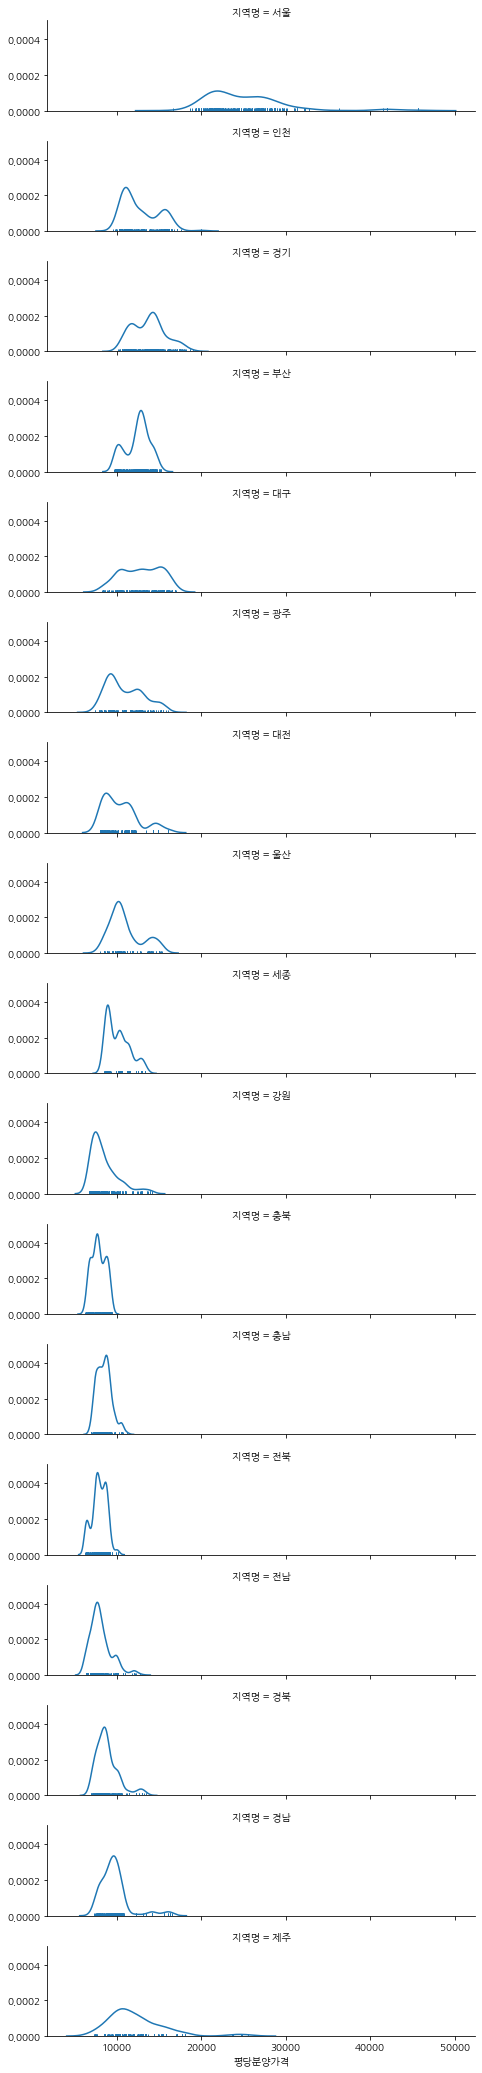

In [111]:
# subplot으로 표현하기 - ridge plot

g = sns.FacetGrid(df_last, row="지역명", 
                  height=1.7, aspect=4,)
g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

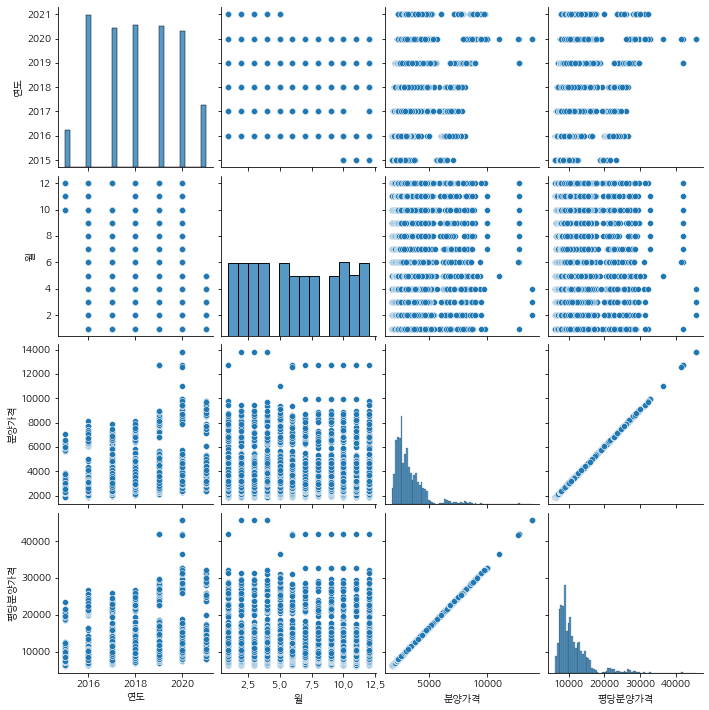

In [112]:
# subplot으로 표현하기 - pairplot

df_last_notnull = df_last[df_last["평당분양가격"].notnull()]
sns.pairplot(df_last_notnull)

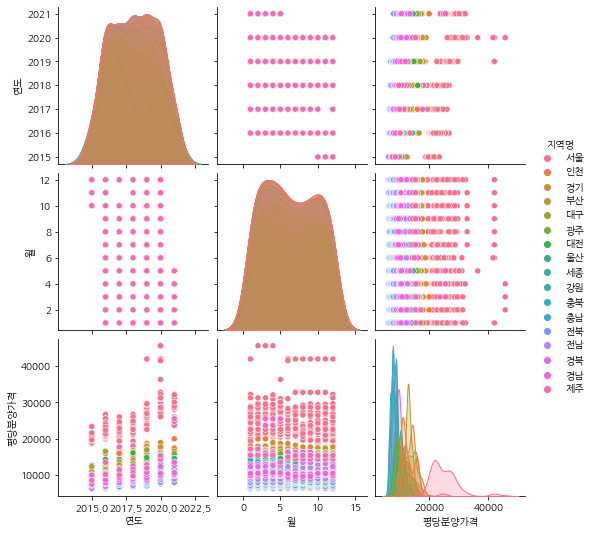

In [113]:
# pairplot 에 보고싶은 애들을 loc와 함께 옵션값에 넣어보면

df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(), ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")  # 지역에 따라 색깔 다르게 표시

평당분양가격으로 봤을 때, 월하고 연도는 크게 큰 의미가 없음
연도나 월을 보면, 특정 월이나 연도에 데이터가 많은데, 그건 특정 연도에 결측치가 있기 때문 
(우리 데이터가 2015년 9월 그렇게 끊겨있잖아)
평당분양가격은 왼쪽으로 몰려있고, 4000만원 넘는 서울의 이상치가 있다는 걸 확인

In [114]:
# 규모구분(전용면적)별로 value_counts를 이용해서 데이터를 집계하기

df_last["전용면적"].value_counts()

60㎡~85㎡     1156
60㎡         1156
85㎡~102㎡    1156
모든면적        1156
102㎡~       1156
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [115]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [120]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


df_last와 df_first의 head만 봐도 너무 달라서 그냥 합칠 수 있는 데이터가 아님을 확인

In [116]:
# 아래에서 데이터프레임 전체를 다 보고 싶으면 이렇게 설정
pd.options.display.max_columns = 25

In [118]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 보기
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [119]:
# 결측치가 있는지 확인

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

결측치 없음

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있음. df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과는 다르기 때문에 같은 형태로 만들어주어야 데이터를 합칠 수 있음. 특히나, df_first는 데이터가 컬럼에 들어가 있는데, 그럼 데이터를 처리할 수가 없어. 그래서 이 두 데이터프레임을 병합하기 위해서는 df_first에 melt를 사용해 열에 있는 데이터를 행으로 녹여보기

https://pandas.pydata.org/docs/user_guide/reshaping.html?highlight=reshaping%20melt


In [122]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [123]:
# df_first에는 지역 컬럼이 있고 나머지는 연도와 월인데,
# 지역 말고 나머지는 다 행으로 녹이겠다라고 한다면
# variable과 value 컬럼이 생김

df_first.melt(id_vars="지역")

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [129]:
# 컬럼의 이름까지 변경하고 싶다면 옵션값 설정해주기
# pd.melt를 사용해서 녹인 데이터는 df_first_melt 변수에 담기

df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [131]:
# df_first_melt 변수에 담겨진 컬럼의 이름을
# ["지역명", "기간", "평당분양가격"]으로 변경하기

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


### 연도와 월을 분리하기
* pandas의 string-handling 사용하기

In [133]:
date = "2013년 12월"
date

'2013년 12월'

In [134]:
# split을 통해 "년"을 기준으로 텍스트를 분리하기

date.split("년")

['2013', ' 12월']

In [135]:
# 리스트의 인덱싱을 사용해서 연도만 가지고오기

date.split("년")[0]

'2013'

In [139]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거하기

date.split("년")[-1].replace("월", "").replace(" ","")

'12'

In [144]:
# parse_year 라는 함수를 만들기
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 하기

def parse_year(date):
    year = int(date.split("년")[0])
    return year

y = parse_year(date)
print(type(y), y)

<class 'int'> 2013


In [145]:
# 제대로 분리가 되었는지 parse_year 함수를 확인

parse_year(date)

2013

In [147]:
# parse_month 라는 함수 만들기
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 하기

def parse_month(date):
    month = int(date.split("년")[-1].replace("월", "").replace(" ", ""))
    return month

m = parse_month(date)
print(type(m), m)

<class 'int'> 12


In [148]:
# 제대로 분리가 되었는지 parse_month 함수를 확인

parse_month(date)

12

In [152]:
# df_first_melt 변수에 담긴 데이터프레임에서
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담기

df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [153]:
# df_first_melt 변수에 담긴 데이터프레임에서
# apply를 활용해 월만 추출해서 새로운 컬럼에 담기

df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [154]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 함
# sample을 활용해서 데이터를 미리보기

df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
3876,충북,2019,7,2149.0,7091.7,60㎡


In [157]:
# 최근 데이터가 담긴 df_last에는 전용면적이 있음

df_last["전용면적"]

0           모든면적
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
5775        모든면적
5776         60㎡
5777     60㎡~85㎡
5778    85㎡~102㎡
5779       102㎡~
Name: 전용면적, Length: 5780, dtype: object

In [159]:
# 이전 데이터가 담긴 df_first에는 전용면적이 없기 때문에 "모든면적"만 사용하도록 하기

df_last[df_last["전용면적"] == "모든면적"]

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적
5,인천,2015,10,3163.0,10437.9,모든면적
10,경기,2015,10,3138.0,10355.4,모든면적
15,부산,2015,10,3112.0,10269.6,모든면적
20,대구,2015,10,2682.0,8850.6,모든면적
...,...,...,...,...,...,...
5755,전북,2021,5,2683.0,8853.9,모든면적
5760,전남,2021,5,2927.0,9659.1,모든면적
5765,경북,2021,5,3027.0,9989.1,모든면적
5770,경남,2021,5,3090.0,10197.0,모든면적


In [160]:
# df_last의 모든 컬럼을 다 사용할 게 아니잖아

df_last.columns.to_list()  # 컬럼들을 리스트로 만들기

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [161]:
# 그래서 우리가 필요한 컬럼들만 새로운 변수에 담기

cols = ["지역명", "연도", "월", "평당분양가격"]
cols

['지역명', '연도', '월', '평당분양가격']

In [165]:
# 이제 df_last에서 우리가 사용하는 컬럼과 값들만 가져오기
# 그걸 df_last_prepare 변수에 담기
# 이때 copy라고 명시적으로 복사를 해주면, df_last_prepare의 값을 변경해도
# df_last에는 영향을 주지 않음

df_last_prepare = df_last.loc[df_last["전용면적"] == "모든면적", cols].copy()
df_last_prepare 

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
5755,전북,2021,5,8853.9
5760,전남,2021,5,9659.1
5765,경북,2021,5,9989.1
5770,경남,2021,5,10197.0


In [168]:
# 마찬가지로 df_first_melt에서 공통된 컬럼만 가져온 뒤에
# copy로 복사해서 df_first_prepare 컬럼에 담기

df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


이렇게 되면, 두 개의 데이터를 합칠 준비가 끝남

### concat으로 데이터 합치기

In [170]:
# df_first_prepare와 df_last_prepare를 합쳐주기

df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1513, 4)

In [172]:
# 제대로 합쳐졌는지 미리보기

df.head()
df.tail()

,지역명,연도,월,평당분양가격
5755,전북,2021,5,8853.9
5760,전남,2021,5,9659.1
5765,경북,2021,5,9989.1
5770,경남,2021,5,10197.0
5775,제주,2021,5,24783.0


In [174]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어보기

df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
2020    204
2021     85
Name: 연도, dtype: int64

### pivot_table 사용하기

In [178]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려보기

t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,9331.0,14383.0,10161.0,9545.0,12500.0,15145.0,11094.0,13248.0,26910.0,11355.0,12203.0,14674.0,8697.0,8317.0,14541.0,8856.0,7960.0
2021,9858.0,14333.0,10214.0,10148.0,13725.0,15442.0,11399.0,14274.0,28295.0,12533.0,14088.0,15542.0,9679.0,8752.0,21322.0,9145.0,8585.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

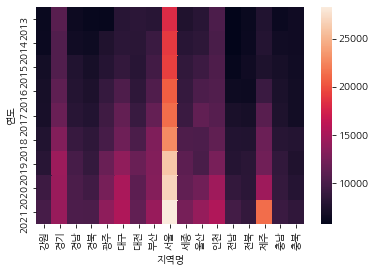

In [179]:
# 위에서 그린 피봇테이블은 숫자만 있어서 잘 알아보기 힘들잖아
# 그래서 히트맵으로 표현해보기

sns.heatmap(t)

색깔이 옅을수록 숫자가 높은거고, 진할수록 작은거. 서울이 가장 옅어서 가격이 높다

<AxesSubplot:xlabel='지역명', ylabel='연도'>

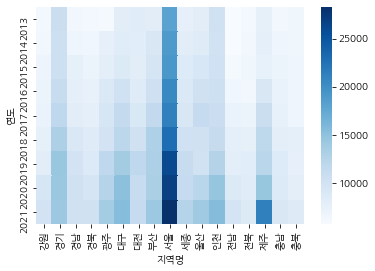

In [180]:
# 여러 색상으로 말고 한가지 색상으로 히트맵을 보고 싶다면

sns.heatmap(t, cmap="Blues")

같은 색깔군으로 표현. 이번에는 색상이 진할수록 가격이 높게 표시됨

<AxesSubplot:xlabel='지역명', ylabel='연도'>

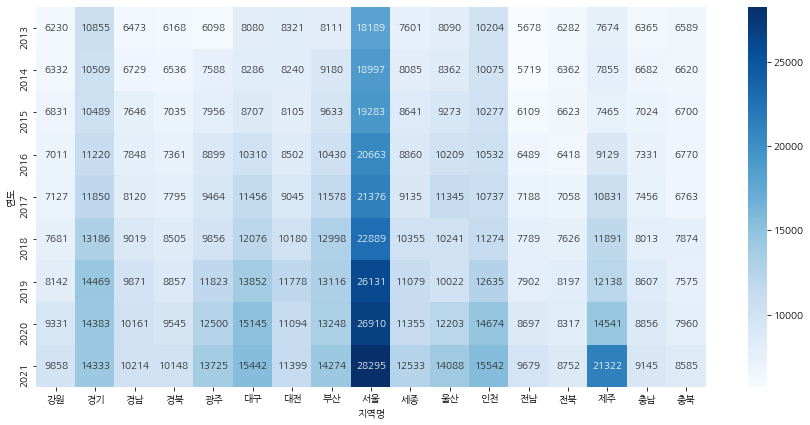

In [185]:
# 히트맵에 값을 나타내고 싶다면 annot=True
# 소수점 없이 보구싶다 fmt(format의 약자)=".0f" (소수점 없이 플롯 형태로 표현)

plt.figure(figsize=(15, 7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f") 

In [188]:
# transpose를 사용하면 행과 열을 바꿔줄 수 있음

t.T  # 이렇게 대문자 T로도 쓸 수 있음
t.transpose()

연도,2013,2014,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7127.0,7681.0,8142.0,9331.0,9858.0
경기,10855.0,10509.0,10489.0,11220.0,11850.0,13186.0,14469.0,14383.0,14333.0
경남,6473.0,6729.0,7646.0,7848.0,8120.0,9019.0,9871.0,10161.0,10214.0
경북,6168.0,6536.0,7035.0,7361.0,7795.0,8505.0,8857.0,9545.0,10148.0
광주,6098.0,7588.0,7956.0,8899.0,9464.0,9856.0,11823.0,12500.0,13725.0
대구,8080.0,8286.0,8707.0,10310.0,11456.0,12076.0,13852.0,15145.0,15442.0
대전,8321.0,8240.0,8105.0,8502.0,9045.0,10180.0,11778.0,11094.0,11399.0
부산,8111.0,9180.0,9633.0,10430.0,11578.0,12998.0,13116.0,13248.0,14274.0
서울,18189.0,18997.0,19283.0,20663.0,21376.0,22889.0,26131.0,26910.0,28295.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

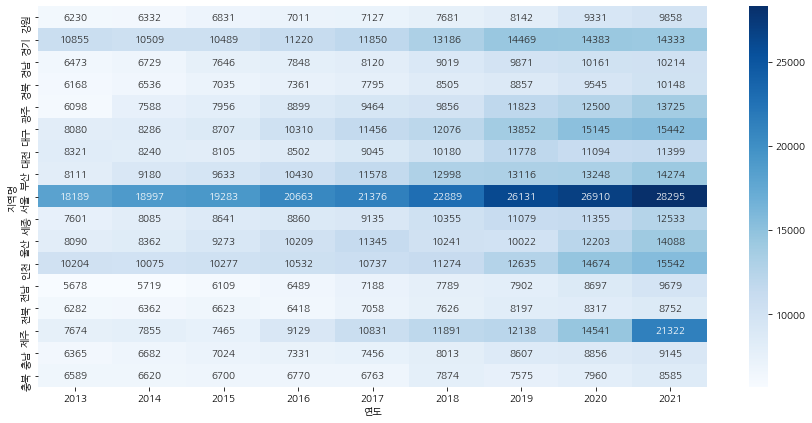

In [189]:
# 히트맵도 행과 열을 바꿔서 표현해보기

plt.figure(figsize=(15, 7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f") 

In [192]:
# pivot_table 말고, groupby로도 그려보기
# 인덱스에 ["연도", "지역명"] 을 넣고 그리기

df.groupby(["연도", "지역명"])["평당분양가격"].mean()

연도    지역명
2013  강원      6230.00
      경기     10855.00
      경남      6473.00
      경북      6168.00
      광주      6098.00
               ...   
2021  전남      9678.90
      전북      8752.26
      제주     21321.96
      충남      9144.96
      충북      8585.28
Name: 평당분양가격, Length: 153, dtype: float64

그럼 이렇게 시리즈 형식으로 나오게됨

In [193]:
# pivot_table이랑 똑같이 만들고 싶다 하면 unstack으로 값을 칼럼으로 빼야됨

g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7127.0,11850.0,8120.0,7795.0,9464.0,11456.0,9045.0,11578.0,21376.0,9135.0,11345.0,10737.0,7188.0,7058.0,10831.0,7456.0,6763.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,9331.0,14383.0,10161.0,9545.0,12500.0,15145.0,11094.0,13248.0,26910.0,11355.0,12203.0,14674.0,8697.0,8317.0,14541.0,8856.0,7960.0
2021,9858.0,14333.0,10214.0,10148.0,13725.0,15442.0,11399.0,14274.0,28295.0,12533.0,14088.0,15542.0,9679.0,8752.0,21322.0,9145.0,8585.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

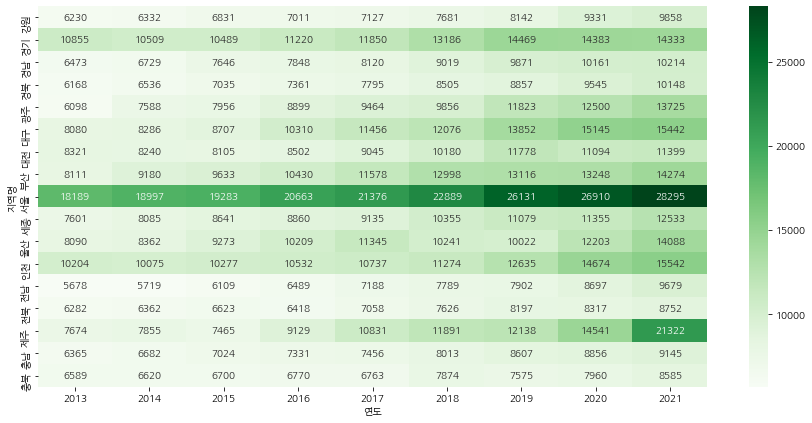

In [196]:
# 똑같이 히트맵으로 그려보면

plt.figure(figsize=(15, 7))
sns.heatmap(g.T, annot=True, fmt=".0f", cmap="Greens")

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

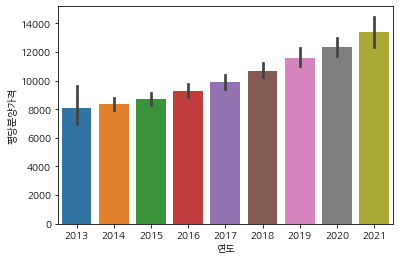

In [199]:
# barplot으로 연도별 평당분양가격 그리기(평균)

sns.barplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

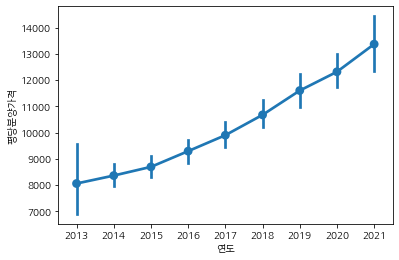

In [201]:
# pointplot으로 연도별 평당분양가격 그리기

sns.pointplot(data=df, x="연도", y="평당분양가격")

기울기에 따른 값의 변화정도를 보기가 더 쉬움

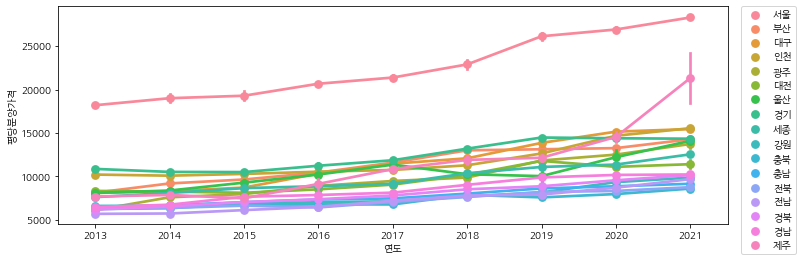

In [205]:
# pointplot으로 연도별 평당분양가격 그리기 + 지역별 그래프

plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

(89, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

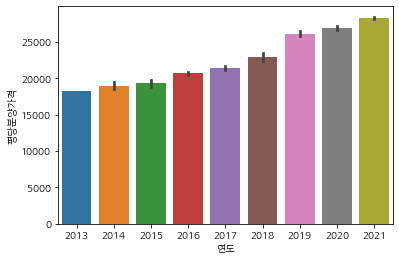

In [211]:
# 서울만 barplot으로 그리기

df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

g = sns.barplot(data=df_seoul, x="연도", y="평당분양가격")
g  # 아무 변수에다가 넣어서 출력하면 밑에 문구 안보이게됨

(89, 4)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

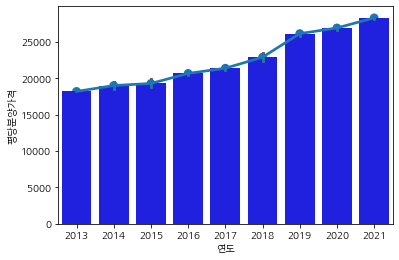

In [217]:
# 서울만 barplot과 pointplot 둘 다 그리기

df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

sns.barplot(data=df_seoul, x="연도", y="평당분양가격", color="b")
sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

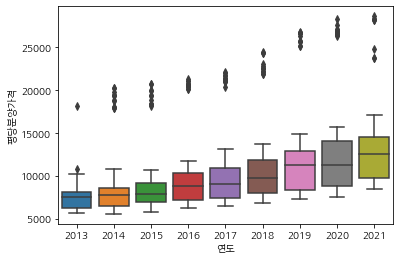

In [218]:
# 연도별 평당분양가격 boxplot 그리기

sns.boxplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

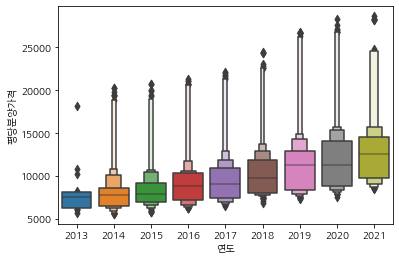

In [219]:
# 연도별 평당분양가격 boxenplot 그리기
# boxenplot은 boxplot과 violinplot의 중간모양 정도 되는 그래프 

sns.boxenplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

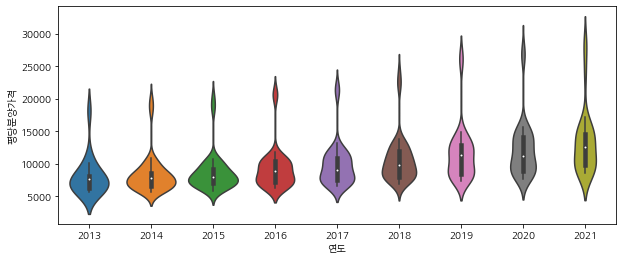

In [221]:
# 연도별 평당분양가격 violinplot 그리기

plt.figure(figsize=(10, 4))
sns.violinplot(data=df, x="연도", y="평당분양가격")

violinplot의 안쪽 검정색 네모가 boxplot을 의미, 가운데 하얀점은 중앙값을 의미

* 그래프의 자세한 정도 : boxplot < boxenplot < violinplot

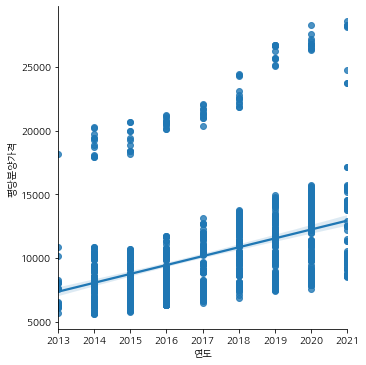

In [222]:
# 연도별 평당분양가격 lmplot 그리기
# lmplot으로 그려보면 scatter 값들이 너무 몰려있어서 분포가 잘 안보여

sns.lmplot(data=df, x="연도", y="평당분양가격")

C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or

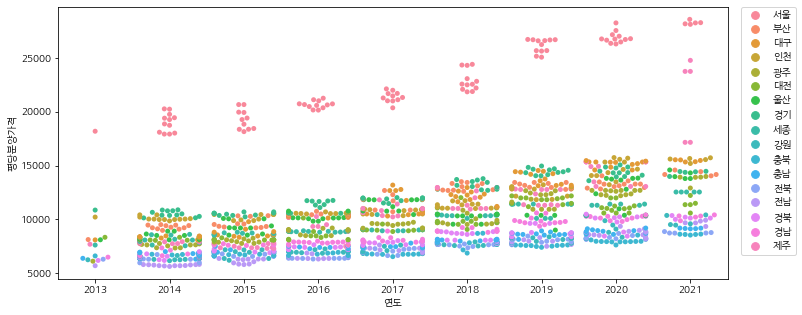

In [227]:
# 그래서 lmplot의 단점을 보완해서 swarmplot을 그리면

plt.figure(figsize=(12, 5)) 
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

* scatterplot보다 swarmplot으로 그렸을 때, 데이터의 분포를 알기가 더 쉬움

2013년은 데이터가 적은게 보임.
데이터가 많으면 가생이 부분이 뭉쳐져서 보임.
위에 둥둥 뜬애들은 이상치

C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or

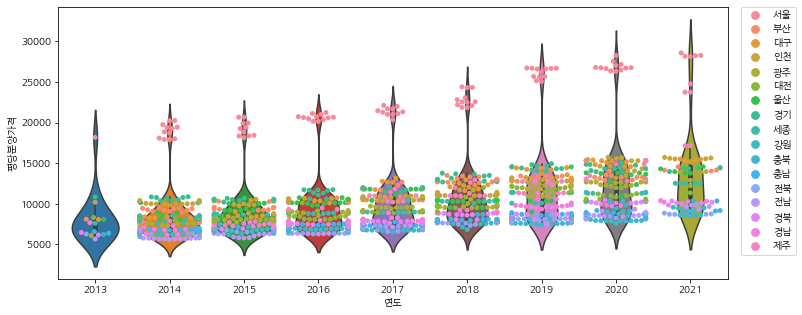

In [229]:
# swarmplot과 violinplot을 같이 그릴 수도 있음

plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x="연도", y="평당분양가격")
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

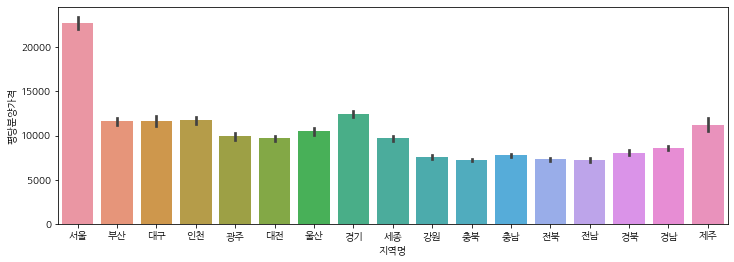

In [231]:
# barplot으로 지역별 평당분양가격을 그리기

plt.figure(figsize=(12, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

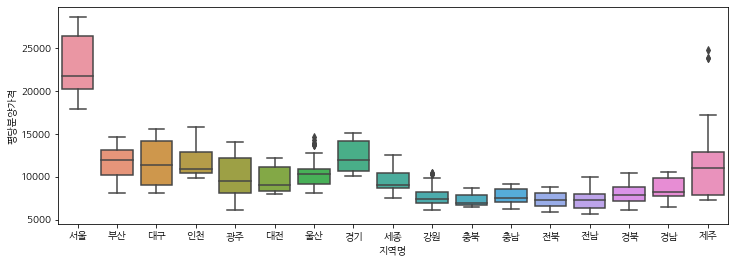

In [232]:
# boxplot으로 지역별 평당분양가격을 그리기

plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

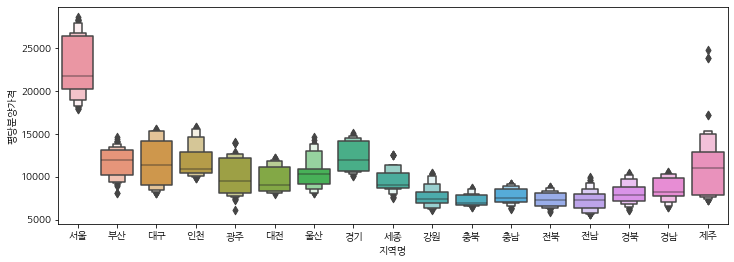

In [234]:
# boxenplot으로 지역별 평당분양가격을 그리기

plt.figure(figsize=(12, 4))
sns.boxenplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

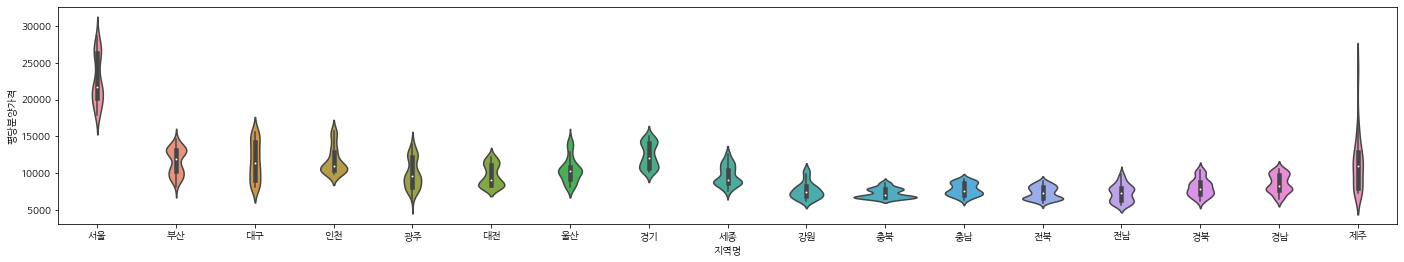

In [235]:
# violinplot으로 지역별 평당분양가격을 그리기

plt.figure(figsize=(24, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\devssom\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or

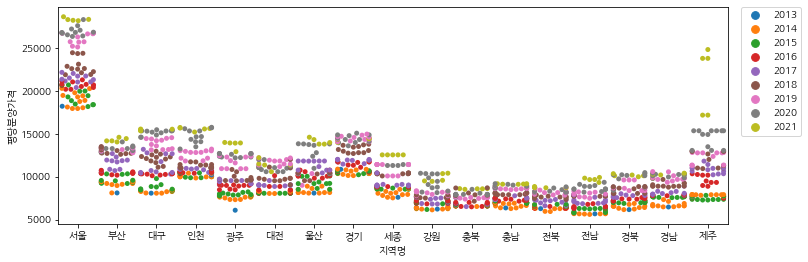

In [239]:
# swarmplot으로 지역별 평당분양가격을 그리기

plt.figure(figsize=(12, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)